In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
pd.set_option('display.float_format', lambda x: '%.5f' % x)

/opt/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string

Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Read block group geometry
bg = gpd.read_file('datasets/03-block-group-geometry/Census_Block_Groups_2010/Census_Block_Groups_2010.shp')
bg.head()

,OBJECTID,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng,SHAPE_Area,geometry
0,1,000100,1,530330001001,Block Group 1,+47.7276870,-122.2815160,100,100.10000,100.1,588.28300,221.04120,367.28558,nan,21168.91854,25625607.58123,"POLYGON ((-122.26840 47.72641, -122.26719 47.7..."
1,2,000100,2,530330001002,Block Group 2,+47.7293165,-122.2924690,100,100.20000,100.2,71.25803,71.26322,0.00000,nan,8692.08919,3103999.78057,"POLYGON ((-122.28970 47.73193, -122.28965 47.7..."
2,3,000100,3,530330001003,Block Group 3,+47.7228093,-122.2894558,100,100.30000,100.3,91.60463,91.61135,0.00000,nan,8560.64577,3990297.62616,"POLYGON ((-122.28633 47.72093, -122.28629 47.7..."
3,4,000100,4,530330001004,Block Group 4,+47.7319367,-122.2944531,100,100.40000,100.4,31.23724,31.23931,0.00000,nan,4693.43961,1360694.38734,"POLYGON ((-122.29237 47.73194, -122.29231 47.7..."
4,5,000100,5,530330001005,Block Group 5,+47.7229283,-122.2944374,100,100.50000,100.5,56.95655,56.96076,0.00000,nan,7450.75925,2481027.13537,"POLYGON ((-122.29273 47.72019, -122.29273 47.7..."


In [3]:
acs = pd.read_csv("SeattleData/ACS/King/R13167062_SL150.csv")
acs.head()

Geo_FIPS            Geo_GEOID       Geo_NAME  \
0  530330001001  15000US530330001001  Block Group 1   
1  530330001002  15000US530330001002  Block Group 2   
2  530330001003  15000US530330001003  Block Group 3   
3  530330001004  15000US530330001004  Block Group 4   
4  530330001005  15000US530330001005  Block Group 5   

                                           Geo_QName Geo_STUSAB  Geo_SUMLEV  \
0  Block Group 1, Census Tract 1, King County, Wa...         wa         150   
1  Block Group 2, Census Tract 1, King County, Wa...         wa         150   
2  Block Group 3, Census Tract 1, King County, Wa...         wa         150   
3  Block Group 4, Census Tract 1, King County, Wa...         wa         150   
4  Block Group 5, Census Tract 1, King County, Wa...         wa         150   

   Geo_GEOCOMP Geo_FILEID  Geo_LOGRECNO  Geo_US  Geo_REGION  Geo_DIVISION  \
0            0      ACSSF          3708     nan         nan           nan   
1            0      ACSSF          3709     nan         nan           nan   
2            0      ACSSF          3710     nan         nan           nan   
3            0      ACSSF          3711     nan         nan           nan   
4            0      ACSSF          3712     nan         nan           nan   

   Geo_STATECE  Geo_STATE  Geo_COUNTY  Geo_COUSUB  Geo_PLACE  Geo_PLACESE  \
0          nan         53          33         nan        nan          nan   
1          nan         53          33         nan        nan          nan   
2          nan         53          33         nan        nan          nan   
3          nan         53          33         nan        nan          nan   
4          nan         53          33         nan        nan          nan   

   Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
0        100           1         nan         nan           nan          nan   
1        100           2         nan         nan           nan          nan   
2        100           3         nan         nan           nan          nan   
3        100           4         nan         nan           nan          nan   
4        100           5         nan         nan           nan          nan   

   Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
0         nan       nan       nan       nan      nan         nan       nan   
1         nan       nan       nan       nan      nan         nan       nan   
2         nan       nan       nan       nan      nan         nan       nan   
3         nan       nan       nan       nan      nan         nan       nan   
4         nan       nan       nan       nan      nan         nan       nan   

   Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
0       nan        nan         nan           nan     nan       nan   
1       nan        nan         nan           nan     nan       nan   
2       nan        nan         nan           nan     nan       nan   
3       nan        nan         nan           nan     nan       nan   
4       nan        nan         nan           nan     nan       nan   

   Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  Geo_SUBMCD  \
0         nan       nan       nan      nan        nan        nan         nan   
1         nan       nan       nan      nan        nan        nan         nan   
2         nan       nan       nan      nan        nan        nan         nan   
3         nan       nan       nan      nan        nan        nan         nan   
4         nan       nan       nan      nan        nan        nan         nan   

   Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  Geo_UGA  \
0        nan        nan        nan     nan      nan      nan      nan   
1        nan        nan        nan     nan      nan      nan      nan   
2        nan        nan        nan     nan      nan      nan      nan   
3        nan        nan        nan     nan      nan      nan      nan   
4        nan        nan        nan     nan      nan      nan    

In [4]:
#Select only Seattle block groups
bg = bg.astype({'GEOID10':'int'})
id_geo = bg['GEOID10'].tolist()
acs=acs[acs['Geo_FIPS'].isin(id_geo)]

In [5]:
acs.head()

Geo_FIPS            Geo_GEOID       Geo_NAME  \
0  530330001001  15000US530330001001  Block Group 1   
1  530330001002  15000US530330001002  Block Group 2   
2  530330001003  15000US530330001003  Block Group 3   
3  530330001004  15000US530330001004  Block Group 4   
4  530330001005  15000US530330001005  Block Group 5   

                                           Geo_QName Geo_STUSAB  Geo_SUMLEV  \
0  Block Group 1, Census Tract 1, King County, Wa...         wa         150   
1  Block Group 2, Census Tract 1, King County, Wa...         wa         150   
2  Block Group 3, Census Tract 1, King County, Wa...         wa         150   
3  Block Group 4, Census Tract 1, King County, Wa...         wa         150   
4  Block Group 5, Census Tract 1, King County, Wa...         wa         150   

   Geo_GEOCOMP Geo_FILEID  Geo_LOGRECNO  Geo_US  Geo_REGION  Geo_DIVISION  \
0            0      ACSSF          3708     nan         nan           nan   
1            0      ACSSF          3709     nan         nan           nan   
2            0      ACSSF          3710     nan         nan           nan   
3            0      ACSSF          3711     nan         nan           nan   
4            0      ACSSF          3712     nan         nan           nan   

   Geo_STATECE  Geo_STATE  Geo_COUNTY  Geo_COUSUB  Geo_PLACE  Geo_PLACESE  \
0          nan         53          33         nan        nan          nan   
1          nan         53          33         nan        nan          nan   
2          nan         53          33         nan        nan          nan   
3          nan         53          33         nan        nan          nan   
4          nan         53          33         nan        nan          nan   

   Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
0        100           1         nan         nan           nan          nan   
1        100           2         nan         nan           nan          nan   
2        100           3         nan         nan           nan          nan   
3        100           4         nan         nan           nan          nan   
4        100           5         nan         nan           nan          nan   

   Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
0         nan       nan       nan       nan      nan         nan       nan   
1         nan       nan       nan       nan      nan         nan       nan   
2         nan       nan       nan       nan      nan         nan       nan   
3         nan       nan       nan       nan      nan         nan       nan   
4         nan       nan       nan       nan      nan         nan       nan   

   Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
0       nan        nan         nan           nan     nan       nan   
1       nan        nan         nan           nan     nan       nan   
2       nan        nan         nan           nan     nan       nan   
3       nan        nan         nan           nan     nan       nan   
4       nan        nan         nan           nan     nan       nan   

   Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  Geo_SUBMCD  \
0         nan       nan       nan      nan        nan        nan         nan   
1         nan       nan       nan      nan        nan        nan         nan   
2         nan       nan       nan      nan        nan        nan         nan   
3         nan       nan       nan      nan        nan        nan         nan   
4         nan       nan       nan      nan        nan        nan         nan   

   Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  Geo_UGA  \
0        nan        nan        nan     nan      nan      nan      nan   
1        nan        nan        nan     nan      nan      nan      nan   
2        nan        nan        nan     nan      nan      nan      nan   
3        nan        nan        nan     nan      nan      nan      nan   
4        nan        nan        nan     nan      nan      nan    

In [6]:
# ACS data dict
def get_key_val(s):
    s2 =  s.split(':')
    key = s2[0]   
    del s2[0]
    val = ''
    for i in s2:
        val += ' ' + i
    return (key.strip(), val.strip('\n').strip())

In [7]:
data_dict = {}
with open("SeattleData/ACS/ACS_data_dict.txt") as file:
    for line in file.readlines():     # readlines should split by '/n' for you
        (key, val) = get_key_val(line)
        data_dict[key] = val

In [8]:
data_dict

{'FIPS': 'FIPS',
 'GEOID': 'Geographic Identifier',
 'NAME': 'Area Name',
 'QName': 'Qualifying Name',
 'STUSAB': 'State Postal Abbreviation',
 'SUMLEV': 'Summary Level',
 'GEOCOMP': 'Geographic Component',
 'FILEID': 'File identification',
 'LOGRECNO': 'Logical Record Number',
 'US': 'US',
 'REGION': 'Census Region',
 'DIVISION': 'Census Division',
 'STATECE': 'State (Census Code)',
 'STATE': 'State (FIPS Code)',
 'COUNTY': 'County of current residence',
 'COUSUB': 'County Subdivision (FIPS)',
 'PLACE': 'Place (FIPS Code)',
 'PLACESE': 'Place (State FIPS + Place FIPS)',
 'TRACT': 'Census Tract',
 'BLKGRP': 'Block Group',
 'CONCIT': 'Consolidated City',
 'AIANHH': 'American Indian Area/Alaska Native Area/Hawaiian Home Land (Census)',
 'AIANHHFP': 'American Indian Area/Alaska Native Area/Hawaiian Home Land (FIPS)',
 'AIHHTLI': 'American Indian Trust Land/Hawaiian Home Land Indicator',
 'AITSCE': 'American Indian Tribal Subdivision (Census)',
 'AITS': 'American Indian Tribal Subdivision 

In [9]:
acs.columns = acs.columns.str.lstrip('SE_')
acs.head()

Geo_FIPS            Geo_GEOID       Geo_NAME  \
0  530330001001  15000US530330001001  Block Group 1   
1  530330001002  15000US530330001002  Block Group 2   
2  530330001003  15000US530330001003  Block Group 3   
3  530330001004  15000US530330001004  Block Group 4   
4  530330001005  15000US530330001005  Block Group 5   

                                           Geo_QName Geo_STUSAB  Geo_SUMLEV  \
0  Block Group 1, Census Tract 1, King County, Wa...         wa         150   
1  Block Group 2, Census Tract 1, King County, Wa...         wa         150   
2  Block Group 3, Census Tract 1, King County, Wa...         wa         150   
3  Block Group 4, Census Tract 1, King County, Wa...         wa         150   
4  Block Group 5, Census Tract 1, King County, Wa...         wa         150   

   Geo_GEOCOMP Geo_FILEID  Geo_LOGRECNO  Geo_US  Geo_REGION  Geo_DIVISION  \
0            0      ACSSF          3708     nan         nan           nan   
1            0      ACSSF          3709     nan         nan           nan   
2            0      ACSSF          3710     nan         nan           nan   
3            0      ACSSF          3711     nan         nan           nan   
4            0      ACSSF          3712     nan         nan           nan   

   Geo_STATECE  Geo_STATE  Geo_COUNTY  Geo_COUSUB  Geo_PLACE  Geo_PLACESE  \
0          nan         53          33         nan        nan          nan   
1          nan         53          33         nan        nan          nan   
2          nan         53          33         nan        nan          nan   
3          nan         53          33         nan        nan          nan   
4          nan         53          33         nan        nan          nan   

   Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
0        100           1         nan         nan           nan          nan   
1        100           2         nan         nan           nan          nan   
2        100           3         nan         nan           nan          nan   
3        100           4         nan         nan           nan          nan   
4        100           5         nan         nan           nan          nan   

   Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
0         nan       nan       nan       nan      nan         nan       nan   
1         nan       nan       nan       nan      nan         nan       nan   
2         nan       nan       nan       nan      nan         nan       nan   
3         nan       nan       nan       nan      nan         nan       nan   
4         nan       nan       nan       nan      nan         nan       nan   

   Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
0       nan        nan         nan           nan     nan       nan   
1       nan        nan         nan           nan     nan       nan   
2       nan        nan         nan           nan     nan       nan   
3       nan        nan         nan           nan     nan       nan   
4       nan        nan         nan           nan     nan       nan   

   Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  Geo_SUBMCD  \
0         nan       nan       nan      nan        nan        nan         nan   
1         nan       nan       nan      nan        nan        nan         nan   
2         nan       nan       nan      nan        nan        nan         nan   
3         nan       nan       nan      nan        nan        nan         nan   
4         nan       nan       nan      nan        nan        nan         nan   

   Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  Geo_UGA  \
0        nan        nan        nan     nan      nan      nan      nan   
1        nan        nan        nan     nan      nan      nan      nan   
2        nan        nan        nan     nan      nan      nan      nan   
3        nan        nan        nan     nan      nan      nan      nan   
4        nan        nan        nan     nan      nan      nan    

### 2. Population Density (Per Sq. Mile)
         Universe:  Total Population
         Name:      A00002
         Variables:
            A00002_001:   Total Population
            A00002_002:   Population Density (Per Sq. Mile)
            A00002_003:   Area (Land)

In [10]:
density = acs[['A00002_002']]
density.columns = density.columns.map(data_dict)
density

,Population Density (Per Sq. Mile)
0,3708.99200
1,14342.32000
2,10101.80000
3,51934.57000
4,15089.69000
...,...
825,5680.55200
848,2000.13600
849,5176.89100
850,2917.44900



### 19. Race
          Universe:  Total Population
          Name:      A03001
          Variables:
             A03001_001:   Total Population:
             A03001_002:      White Alone
             A03001_003:      Black or African American Alone
             A03001_004:      American Indian and Alaska Native Alone
             A03001_005:      Asian Alone
             A03001_006:      Native Hawaiian and Other Pacific Islander Alone
             A03001_007:      Some Other Race Alone
             A03001_008:      Two or More Races


In [11]:
race = acs[['A03001_001','A03001_002','A03001_003','A03001_004','A03001_005','A03001_006','A03001_007','A03001_008']]
race.columns = race.columns.map(data_dict)
race['White Alone%'] = race.iloc[:, 1]/race.iloc[:, 0]
race['Black or African American Alone%'] = race.iloc[:, 2]/race.iloc[:, 0]
race['American Indian and Alaska Native Alone%'] = race.iloc[:, 3]/race.iloc[:, 0]
race['Asian Alone%'] = race.iloc[:, 4]/race.iloc[:, 0]
race['Native Hawaiian and Other Pacific Islander Alone%'] = race.iloc[:, 5]/race.iloc[:, 0]
race['Some Other Race Alone%'] = race.iloc[:, 6]/race.iloc[:, 0]
race['Two or More Race%'] = race.iloc[:, 7]/race.iloc[:, 0]

In [12]:
race = race.iloc[:, [8,9,10,11,12,13,14]]

In [13]:
race.head() 

,White Alone%,Black or African American Alone%,American Indian and Alaska Native Alone%,Asian Alone%,Native Hawaiian and Other Pacific Islander Alone%,Some Other Race Alone%,Two or More Race%
0,0.85324,0.00000,0.01249,0.08119,0.00000,0.00000,0.05308
1,0.50094,0.19286,0.00000,0.14903,0.00000,0.01879,0.13838
2,0.60097,0.06086,0.00000,0.21508,0.00000,0.05048,0.07261
3,0.35661,0.37594,0.00394,0.10493,0.00000,0.02091,0.13767
4,0.64855,0.03500,0.00968,0.21072,0.00000,0.08637,0.00968


In [14]:
race_d = acs[['A03001_002','A03001_003','A03001_004','A03001_005','A03001_006','A03001_007','A03001_008']]
race_d.columns = race_d.columns.map(data_dict)

In [15]:
race_d

,Total Population White Alone,Total Population Black or African American Alone,Total Population American Indian and Alaska Native Alone,Total Population Asian Alone,Total Population Native Hawaiian and Other Pacific Islander Alone,Total Population Some Other Race Alone,Total Population Two or More Races
0,1093,0,16,104,0,0,68
1,800,308,0,238,0,30,221
2,869,88,0,311,0,73,105
3,904,953,10,266,0,53,349
4,871,47,13,283,0,116,13
...,...,...,...,...,...,...,...
825,596,282,0,285,0,135,57
848,689,83,0,72,0,15,0
849,603,81,46,286,0,348,59
850,205,327,0,192,24,25,152


In [16]:
#Convert df to dict
a = race_d.to_dict(orient='records')

In [17]:
def simpson_di(data):

    """ Given a hash { 'species': count } , returns the Simpson Diversity Index
    
    >>> simpson_di({'a': 10, 'b': 20, 'c': 30,})
    0.3888888888888889
    """

    def p(n, N):
        """ Relative abundance """
        if n is  0:
            return 0
        else:
            return float(n)/N

    N = sum(data.values())
    
    return sum(p(n, N)**2 for n in data.values() if n is not 0)

In [18]:
k=[]
for i in a:
    y = simpson_di(i)
    k.append(y)

In [19]:
race['Racial Diversity'] = k

In [20]:
race.head()

,White Alone%,Black or African American Alone%,American Indian and Alaska Native Alone%,Asian Alone%,Native Hawaiian and Other Pacific Islander Alone%,Some Other Race Alone%,Two or More Race%,Racial Diversity
0,0.85324,0.00000,0.01249,0.08119,0.00000,0.00000,0.05308,0.73758
1,0.50094,0.19286,0.00000,0.14903,0.00000,0.01879,0.13838,0.32985
2,0.60097,0.06086,0.00000,0.21508,0.00000,0.05048,0.07261,0.41895
3,0.35661,0.37594,0.00394,0.10493,0.00000,0.02091,0.13767,0.29891
4,0.64855,0.03500,0.00968,0.21072,0.00000,0.08637,0.00968,0.47389


 ### 24. Households by Household Type
          Universe:  Households
          Name:      A10008
          Variables:
             A10008_001:   Households:
             A10008_002:      Family Households:
             A10008_003:         Married-Couple Family
             A10008_004:         Other Family:
             A10008_005:            Male Householder, No Wife Present
             A10008_006:            Female Householder, No Husband Present
             A10008_007:      Nonfamily Households:
             A10008_008:         Male Householder
             A10008_009:         Female Householder

In [21]:
households = acs[['A10008_001','A10008_002']]
households.columns = households.columns.map(data_dict)

In [22]:
households['Family Households%'] = households.iloc[:, 1]/households.iloc[:, 0]

In [23]:
households = households[['Family Households%']]
households.head()

,Family Households%
0,0.77432
1,0.48919
2,0.43062
3,0.41774
4,0.37967


      38. Average Household Size
          Universe:  Occupied Households
          Name:      A10003
          Variables:
             A10003_001:   Average Household Size

In [24]:
household_size = acs[['A10003_001']]
household_size.columns = household_size.columns.map(data_dict)
household_size.head()

,Average Household Size
0,2.49000
1,2.14000
2,2.05000
3,2.04000
4,1.72000


      43. Educational Attainment for Population 25 Years and Over
          Universe:  Population 25 Years and Over
          Name:      A12001
          Variables:
             A12001_001:   Population 25 Years and Over:
             A12001_002:      Less than High School
             A12001_003:      High School Graduate (Includes Equivalency)
             A12001_004:      Some College
             A12001_005:      Bachelor's Degree
             A12001_006:      Master's Degree
             A12001_007:      Professional School Degree
             A12001_008:      Doctorate Degree

In [25]:
edu = acs[['A12001_001','A12001_002','A12001_003','A12001_004','A12001_005','A12001_006','A12001_007','A12001_008']]
edu.columns = edu.columns.map(data_dict)
edu['Less than High School%'] = edu.iloc[:, 1]/edu.iloc[:, 0]
edu['High School Graduate%'] = edu.iloc[:, 2]/edu.iloc[:, 0]
edu['Some College%'] = edu.iloc[:, 3]/edu.iloc[:, 0]
edu['Bachelors Degree%'] = edu.iloc[:, 4]/edu.iloc[:, 0]
edu['Masters Degree%'] = edu.iloc[:, 5]/edu.iloc[:, 0]
edu['Professional School Degree%'] = edu.iloc[:, 6]/edu.iloc[:, 0]
edu['Doctorate Degree%'] = edu.iloc[:, 7]/edu.iloc[:, 0]

In [26]:
edu = edu.iloc[:, [8,9,10,11,12,13,14]]
edu

,Less than High School%,High School Graduate%,Some College%,Bachelors Degree%,Masters Degree%,Professional School Degree%,Doctorate Degree%
0,0.00000,0.08101,0.18343,0.34358,0.13222,0.17877,0.08101
1,0.12966,0.13043,0.38432,0.18556,0.09161,0.07842,0.00000
2,0.03497,0.15690,0.28450,0.29112,0.09830,0.09168,0.04253
3,0.10406,0.23868,0.22222,0.30864,0.09759,0.01705,0.01176
4,0.20287,0.21531,0.23349,0.21244,0.10813,0.00000,0.02775
...,...,...,...,...,...,...,...
825,0.05096,0.08365,0.37500,0.35769,0.04519,0.07692,0.01058
848,0.07625,0.31250,0.24375,0.22875,0.12000,0.01875,0.00000
849,0.22549,0.23965,0.40741,0.09586,0.03159,0.00000,0.00000
850,0.35417,0.41477,0.15152,0.07955,0.00000,0.00000,0.00000



      61. Unemployment Rate for Civilian Population in Labor Force 16 Years and Over
          Universe:  Civilian Population in Labor Force 16 Years and Over:
          Name:      A17005
          Variables:
             A17005_001:   Civilian Population in Labor Force 16 Years and Over:
             A17005_002:      Employed
             A17005_003:      Unemployed

In [27]:
unemployment = acs[['A17005_001','A17005_003']]
unemployment.columns = unemployment.columns.map(data_dict)
unemployment['Unemployed%'] = unemployment.iloc[:, 1]/unemployment.iloc[:, 0]

In [28]:
unemployment = unemployment.iloc[:,[2]]
unemployment

,Unemployed%
0,0.02281
1,0.08854
2,0.01828
3,0.08967
4,0.11345
...,...
825,0.00000
848,0.06301
849,0.05741
850,0.03467



      89. Median Household Income (In <DollarYear> Inflation Adjusted Dollars)
          Universe:  Households
          Name:      A14006
          Variables:
             A14006_001:   Median Household Income (In 2019 Inflation Adjusted Dollars)

       91. Average Household Income (In <DollarYear> Inflation Adjusted Dollars)
          Universe:  Households
          Name:      A14008
          Variables:
             A14008_001:   Average Household Income (In 2019 Inflation Adjusted Dollars)

     93. Median Family Income (In <DollarYear> Inflation Adjusted Dollars)
          Universe:  Families
          Name:      A14010
          Variables:
             A14010_001:   Median Family Income (In 2019 Inflation Adjusted Dollars)


      94. Average Family Income (In <DollarYear> Inflation Adjusted Dollars)
          Universe:  Families
          Name:      A14011
          Variables:
             A14011_001:   Average Family Income (In 2019 Inflation Adjusted Dollars)

  116. Per Capita Income (In <DollarYear> Inflation Adjusted Dollars)
           Universe:  Total Population
           Name:      A14024
           Variables:
              A14024_001:   Per Capita Income (In 2019 Inflation Adjusted Dollars)

     131. Tenure
           Universe:  Occupied Housing Units
           Name:      A10060
           Variables:
              A10060_001:   Occupied Housing Units:
              A10060_002:      Owner Occupied
              A10060_003:      Renter Occupied

In [29]:
income = acs[['A14006_001','A14008_001','A14010_001','A14011_001','A14024_001']]
income.columns = income.columns.map(data_dict)
income.head()

,Median Household Income (In 2019 Inflation Adjusted Dollars),Average Household Income (In 2019 Inflation Adjusted Dollars),Median Family Income (In 2019 Inflation Adjusted Dollars),Average Family Income (In 2019 Inflation Adjusted Dollars),Per Capita Income (In 2019 Inflation Adjusted Dollars)
0,206400.00000,258515.36965,216667.00000,300456.28141,104882.00000
1,50714.00000,60121.48649,49583.00000,75180.93923,28358.00000
2,51397.00000,79918.31187,115508.00000,111739.20266,39294.00000
3,42150.00000,54727.82258,41750.00000,57814.47876,26804.00000
4,47292.00000,58352.38095,85136.00000,86853.55932,34484.00000


In [30]:
tenure = acs[['A10060_001','A10060_002','A10060_003']]
tenure['Owner Occupied%'] = tenure.iloc[:, 1]/tenure.iloc[:, 0]
tenure['Renter Occupied%'] = tenure.iloc[:, 2]/tenure.iloc[:, 0]
tenure = tenure.iloc[:, [3,4]]
tenure.head()

,Owner Occupied%,Renter Occupied%
0,0.90661,0.09339
1,0.13784,0.86216
2,0.38627,0.61373
3,0.07742,0.92258
4,0.15573,0.84427


     135. Housing Units in Structure
           Universe:  Housing Units
           Name:      A10032
           Variables:
              A10032_001:   Housing Units:
              A10032_002:      1 Unit:
              A10032_003:         1, Detached
              A10032_004:         1, Attached
              A10032_005:      2
              A10032_006:      3 or 4
              A10032_007:      5 to 9
              A10032_008:      10 to 19
              A10032_009:      20 to 49
              A10032_010:      50 or More
              A10032_011:      Mobile Home
              A10032_012:      Boat, Rv, Van, Etc.


In [31]:
h_units = acs[['A10032_001','A10032_003','A10032_004','A10032_005','A10032_006','A10032_007','A10032_008','A10032_009','A10032_010']]
h_units.columns = h_units.columns.map(data_dict)
h_units['1, Detached%'] = h_units.iloc[:, 1]/h_units.iloc[:, 0]
h_units['1, Attached%'] = h_units.iloc[:, 2]/h_units.iloc[:, 0]
h_units['2%'] = h_units.iloc[:, 3]/h_units.iloc[:, 0]
h_units['3 or 4%'] = h_units.iloc[:, 4]/h_units.iloc[:, 0]
h_units['5 to 9%'] = h_units.iloc[:, 5]/h_units.iloc[:, 0]
h_units['10 to 19%'] = h_units.iloc[:, 6]/h_units.iloc[:, 0]
h_units['20 to 49%'] = h_units.iloc[:, 7]/h_units.iloc[:, 0]
h_units['50 or More%'] = h_units.iloc[:, 8]/h_units.iloc[:, 0]
h_units

,Housing Units,"Housing Units 1 Unit 1, Detached","Housing Units 1 Unit 1, Attached",Housing Units 2,Housing Units 3 or 4,Housing Units 5 to 9,Housing Units 10 to 19,Housing Units 20 to 49,Housing Units 50 or More,"1, Detached%","1, Attached%",2%,3 or 4%,5 to 9%,10 to 19%,20 to 49%,50 or More%
0,531,531,0,0,0,0,0,0,0,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,880,118,47,0,70,0,15,168,462,0.13409,0.05341,0.00000,0.07955,0.00000,0.01705,0.19091,0.52500
2,713,266,34,11,11,25,18,72,276,0.37307,0.04769,0.01543,0.01543,0.03506,0.02525,0.10098,0.38710
3,1328,19,23,0,31,56,348,323,528,0.01431,0.01732,0.00000,0.02334,0.04217,0.26205,0.24322,0.39759
4,819,71,46,0,0,15,0,47,640,0.08669,0.05617,0.00000,0.00000,0.01832,0.00000,0.05739,0.78144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,640,640,0,0,0,0,0,0,0,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
848,561,174,23,15,75,40,132,57,45,0.31016,0.04100,0.02674,0.13369,0.07130,0.23529,0.10160,0.08021
849,492,152,0,0,41,99,12,119,69,0.30894,0.00000,0.00000,0.08333,0.20122,0.02439,0.24187,0.14024
850,275,103,30,25,13,77,16,0,0,0.37455,0.10909,0.09091,0.04727,0.28000,0.05818,0.00000,0.00000


In [32]:
h_units = h_units.iloc[:, 9:17]

In [33]:
h_units.head()

,"1, Detached%","1, Attached%",2%,3 or 4%,5 to 9%,10 to 19%,20 to 49%,50 or More%
0,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.13409,0.05341,0.00000,0.07955,0.00000,0.01705,0.19091,0.52500
2,0.37307,0.04769,0.01543,0.01543,0.03506,0.02525,0.10098,0.38710
3,0.01431,0.01732,0.00000,0.02334,0.04217,0.26205,0.24322,0.39759
4,0.08669,0.05617,0.00000,0.00000,0.01832,0.00000,0.05739,0.78144



      156. Median House Value for All Owner-Occupied Housing Units
           Universe:  Owner-occupied housing units
           Name:      A10036
           Variables:
              A10036_001:   Median Value

     163. Median Gross Rent
           Universe:  Renter-occupied housing units paying cash rent
           Name:      A18009
           Variables:
              A18009_001:   Median Gross Rent

     164. Median Gross Rent as a Percentage of Household Income in the Past 12 Months (Dollars)
           Universe:  Renter-occupied housing units paying cash rent
           Name:      A18003
           Variables:
              A18003_001:   Median Gross Rent as a Percentage of Household  Income in the Past 12 Months (Dollars)

    165. Average Gross Rent
           Universe:  Renter-occupied housing units
           Name:      A18005
           Variables:
              A18005_001:   Average Gross Rent for Renter-Occupied Housing Units

In [34]:
h_value = acs[['A10036_001','A18009_001','A18003_001','A18005_001']]
h_value.columns = h_value.columns.map(data_dict)
h_value.head()

,Median Value,Median Gross Rent,Median Gross Rent as a Percentage of Household Income in the Past 12 Months (Dollars),Average Gross Rent for Renter-Occupied Housing Units
0,798900.00000,1914.00000,32.40000,1991.66667
1,603800.00000,1423.00000,35.20000,1426.17555
2,554900.00000,445.00000,26.80000,691.37529
3,212200.00000,1333.00000,32.20000,1327.88462
4,592000.00000,1539.00000,43.70000,1505.48780


       A10055_001:     Occupied Housing Units
      A10055_002:     Occupied Housing Units: Built 2014 or Later
      A10055_003:     Occupied Housing Units: Built 2010 to 2013
      A10055_004:     Occupied Housing Units: Built 2000 to 2009
      A10055_005:     Occupied Housing Units: Built 1990 to 1999
      A10055_006:     Occupied Housing Units: Built 1980 to 1989
      A10055_007:     Occupied Housing Units: Built 1970 to 1979
      A10055_008:     Occupied Housing Units: Built 1960 to 1969
      A10055_009:     Occupied Housing Units: Built 1950 to 1959
      A10055_010:     Occupied Housing Units: Built 1940 to 1949
      A10055_011:     Occupied Housing Units: Built 1939 or Earlier

In [35]:
housing_age = acs[['A10055_001','A10055_002','A10055_003','A10055_004','A10055_005','A10055_006','A10055_007','A10055_008','A10055_009','A10055_010','A10055_011']]
housing_age.columns = housing_age.columns.map(data_dict)

In [36]:
housing_age['2014 or Later%'] = housing_age.iloc[:, 1]/housing_age.iloc[:, 0]
housing_age['2010 to 2013%'] = housing_age.iloc[:, 2]/housing_age.iloc[:, 0]
housing_age['2000 to 2009%'] = housing_age.iloc[:, 3]/housing_age.iloc[:, 0]
housing_age['1990 to 1999%'] = housing_age.iloc[:, 4]/housing_age.iloc[:, 0]
housing_age['1980 to 1989%'] = housing_age.iloc[:, 5]/housing_age.iloc[:, 0]
housing_age['1970 to 1979%'] = housing_age.iloc[:, 6]/housing_age.iloc[:, 0]
housing_age['1960 to 1969%'] = housing_age.iloc[:, 7]/housing_age.iloc[:, 0]
housing_age['1950 to 1959%'] = housing_age.iloc[:, 8]/housing_age.iloc[:, 0]
housing_age['1940 to 1949%'] = housing_age.iloc[:, 9]/housing_age.iloc[:, 0]
housing_age['1939 or Earlier%'] = housing_age.iloc[:, 10]/housing_age.iloc[:, 0]

In [37]:
housing_age = housing_age.iloc[:, [11,12,13,14,15,16,17,18,19,20]]

In [38]:
housing_age

,2014 or Later%,2010 to 2013%,2000 to 2009%,1990 to 1999%,1980 to 1989%,1970 to 1979%,1960 to 1969%,1950 to 1959%,1940 to 1949%,1939 or Earlier%
0,0.02724,0.00000,0.06031,0.03891,0.06420,0.07004,0.20817,0.19455,0.18482,0.15175
1,0.07027,0.17027,0.03108,0.31351,0.16622,0.04730,0.06081,0.01892,0.06757,0.05405
2,0.01860,0.07010,0.15880,0.06438,0.13877,0.13019,0.21316,0.02718,0.10157,0.07725
3,0.21613,0.14597,0.05242,0.03306,0.12742,0.26774,0.04355,0.04919,0.00000,0.06452
4,0.05920,0.07851,0.60489,0.14929,0.00000,0.06049,0.02574,0.00000,0.02188,0.00000
...,...,...,...,...,...,...,...,...,...,...
825,0.03109,0.00000,0.00000,0.02763,0.03282,0.01727,0.03109,0.37478,0.45423,0.03109
848,0.00000,0.02674,0.00000,0.02674,0.19073,0.28699,0.26560,0.06417,0.03743,0.10160
849,0.00000,0.00000,0.00000,0.00000,0.15244,0.25203,0.45122,0.02236,0.07520,0.04675
850,0.00000,0.17455,0.13091,0.13818,0.24364,0.04000,0.00000,0.12727,0.00000,0.14545


   199. Means of Transportation to Work for Workers 16 Years and Over
           Universe:  Workers 16 Years and Over
           Name:      A09005
           Variables:
              A09005_001:   Workers 16 Years and Over:
              A09005_002:      Car, Truck, or Van
              A09005_009:         Drove Alone
              A09005_010:         Carpooled
              A09005_003:      Public Transportation (Includes Taxicab)
              A09005_004:      Motorcycle
              A09005_005:      Bicycle
              A09005_006:      Walked
              A09005_007:      Other Means
              A09005_008:      Worked At Home


In [39]:
travel_to_work = acs[['A09005_001','A09005_002','A09005_009','A09005_010','A09005_003','A09005_004','A09005_005','A09005_006','A09005_007','A09005_008']]
travel_to_work.columns = travel_to_work.columns.map(data_dict)
travel_to_work['Car, Truck, or Van%'] = travel_to_work.iloc[:, 1]/travel_to_work.iloc[:, 0]
travel_to_work['Drove Alone%'] = travel_to_work.iloc[:, 2]/travel_to_work.iloc[:, 0]
travel_to_work['Carpooled%'] = travel_to_work.iloc[:, 3]/travel_to_work.iloc[:, 0]
travel_to_work['Public Transportation%'] = travel_to_work.iloc[:, 4]/travel_to_work.iloc[:, 0]
travel_to_work['Motorcycle%'] = travel_to_work.iloc[:, 5]/travel_to_work.iloc[:, 0]
travel_to_work['Bicycle%'] = travel_to_work.iloc[:, 6]/travel_to_work.iloc[:, 0]
travel_to_work['Walked%'] = travel_to_work.iloc[:, 7]/travel_to_work.iloc[:, 0]
travel_to_work['Other Means%'] = travel_to_work.iloc[:, 8]/travel_to_work.iloc[:, 0]
travel_to_work['Worked At Home%'] = travel_to_work.iloc[:, 9]/travel_to_work.iloc[:, 0]
travel_to_work

,Workers 16 Years and Over,"Workers 16 Years and Over Car, Truck, or Van",Workers 16 Years and Over Drove Alone,Workers 16 Years and Over Carpooled,Workers 16 Years and Over Public Transportation (Includes Taxicab),Workers 16 Years and Over Motorcycle,Workers 16 Years and Over Bicycle,Workers 16 Years and Over Walked,Workers 16 Years and Over Other Means,Workers 16 Years and Over Worked At Home,"Car, Truck, or Van%",Drove Alone%,Carpooled%,Public Transportation%,Motorcycle%,Bicycle%,Walked%,Other Means%,Worked At Home%
0,814,559,527,32,33,0,71,0,12,139,0.68673,0.64742,0.03931,0.04054,0.00000,0.08722,0.00000,0.01474,0.17076
1,803,494,430,64,258,0,0,18,0,33,0.61519,0.53549,0.07970,0.32130,0.00000,0.00000,0.02242,0.00000,0.04110
2,752,486,395,91,204,0,20,42,0,0,0.64628,0.52527,0.12101,0.27128,0.00000,0.02660,0.05585,0.00000,0.00000
3,1314,883,749,134,328,0,53,0,0,50,0.67199,0.57002,0.10198,0.24962,0.00000,0.04033,0.00000,0.00000,0.03805
4,827,497,279,218,230,0,17,62,0,21,0.60097,0.33736,0.26360,0.27811,0.00000,0.02056,0.07497,0.00000,0.02539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,750,637,468,169,32,0,0,0,0,81,0.84933,0.62400,0.22533,0.04267,0.00000,0.00000,0.00000,0.00000,0.10800
848,461,359,330,29,65,0,0,0,0,37,0.77874,0.71584,0.06291,0.14100,0.00000,0.00000,0.00000,0.00000,0.08026
849,797,711,610,101,56,0,0,18,0,12,0.89210,0.76537,0.12673,0.07026,0.00000,0.00000,0.02258,0.00000,0.01506
850,320,213,158,55,56,0,0,10,0,41,0.66563,0.49375,0.17188,0.17500,0.00000,0.00000,0.03125,0.00000,0.12812


In [40]:
travel_to_work = travel_to_work.iloc[:, -9:-1]
travel_to_work.head()

,"Car, Truck, or Van%",Drove Alone%,Carpooled%,Public Transportation%,Motorcycle%,Bicycle%,Walked%,Other Means%
0,0.68673,0.64742,0.03931,0.04054,0.00000,0.08722,0.00000,0.01474
1,0.61519,0.53549,0.07970,0.32130,0.00000,0.00000,0.02242,0.00000
2,0.64628,0.52527,0.12101,0.27128,0.00000,0.02660,0.05585,0.00000
3,0.67199,0.57002,0.10198,0.24962,0.00000,0.04033,0.00000,0.00000
4,0.60097,0.33736,0.26360,0.27811,0.00000,0.02056,0.07497,0.00000


      202. Travel Time to Work for Workers 16 Years and Over (Who Did Not Work At Home)
           Universe:  Workers 16 Years and Over Who Did Not Work at Home
           Name:      B09001
           Variables:
              B09001_001:   Workers 16 Years and Over Who Did Not Work At Home:
              B09001_002:      Less than 10 Minutes
              B09001_003:      10 to 19 Minutes
              B09001_004:      20 to 29 Minutes
              B09001_005:      30 to 39 Minutes
              B09001_006:      40 to 59 Minutes
              B09001_007:      60 to 89 Minutes
              B09001_008:      90 or More Minutes

In [41]:
time_to_work = acs[['B09001_001','B09001_002','B09001_003','B09001_004','B09001_005','B09001_006','B09001_007','B09001_008']]
time_to_work.columns = time_to_work.columns.map(data_dict)
time_to_work['Less than 10 Minutes%'] = time_to_work.iloc[:, 1]/time_to_work.iloc[:, 0]
time_to_work['10 to 19 Minutes%'] = time_to_work.iloc[:, 2]/time_to_work.iloc[:, 0]
time_to_work['20 to 29 Minutes%'] = time_to_work.iloc[:, 3]/time_to_work.iloc[:, 0]
time_to_work['30 to 39 Minutes%'] = time_to_work.iloc[:, 4]/time_to_work.iloc[:, 0]
time_to_work['40 to 59 Minutes%'] = time_to_work.iloc[:, 5]/time_to_work.iloc[:, 0]
time_to_work['60 to 89 Minutes%'] = time_to_work.iloc[:, 6]/time_to_work.iloc[:, 0]
time_to_work['90 or More Minutes%'] = time_to_work.iloc[:, 7]/time_to_work.iloc[:, 0]
time_to_work

,Workers 16 Years and Over Who Did Not Work At Home,Workers 16 Years and Over Who Did Not Work At Home Less than 10 Minutes,Workers 16 Years and Over Who Did Not Work At Home 10 to 19 Minutes,Workers 16 Years and Over Who Did Not Work At Home 20 to 29 Minutes,Workers 16 Years and Over Who Did Not Work At Home 30 to 39 Minutes,Workers 16 Years and Over Who Did Not Work At Home 40 to 59 Minutes,Workers 16 Years and Over Who Did Not Work At Home 60 to 89 Minutes,Workers 16 Years and Over Who Did Not Work At Home 90 or More Minutes,Less than 10 Minutes%,10 to 19 Minutes%,20 to 29 Minutes%,30 to 39 Minutes%,40 to 59 Minutes%,60 to 89 Minutes%,90 or More Minutes%
0,675,38,190,254,108,66,19,0,0.05630,0.28148,0.37630,0.16000,0.09778,0.02815,0.00000
1,770,37,179,151,230,120,33,20,0.04805,0.23247,0.19610,0.29870,0.15584,0.04286,0.02597
2,752,48,70,241,166,203,1,23,0.06383,0.09309,0.32048,0.22074,0.26995,0.00133,0.03059
3,1264,72,183,378,222,268,98,43,0.05696,0.14478,0.29905,0.17563,0.21203,0.07753,0.03402
4,806,90,85,220,202,209,0,0,0.11166,0.10546,0.27295,0.25062,0.25931,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,669,0,106,222,127,187,27,0,0.00000,0.15845,0.33184,0.18984,0.27952,0.04036,0.00000
848,424,33,133,103,27,31,97,0,0.07783,0.31368,0.24292,0.06368,0.07311,0.22877,0.00000
849,785,78,309,157,54,120,67,0,0.09936,0.39363,0.20000,0.06879,0.15287,0.08535,0.00000
850,279,9,62,62,91,26,29,0,0.03226,0.22222,0.22222,0.32616,0.09319,0.10394,0.00000


In [42]:
time_to_work = time_to_work.iloc[:, -7:-1]
time_to_work.head()

,Less than 10 Minutes%,10 to 19 Minutes%,20 to 29 Minutes%,30 to 39 Minutes%,40 to 59 Minutes%,60 to 89 Minutes%
0,0.05630,0.28148,0.37630,0.16000,0.09778,0.02815
1,0.04805,0.23247,0.19610,0.29870,0.15584,0.04286
2,0.06383,0.09309,0.32048,0.22074,0.26995,0.00133
3,0.05696,0.14478,0.29905,0.17563,0.21203,0.07753
4,0.11166,0.10546,0.27295,0.25062,0.25931,0.00000


     206. Average Commute to Work (In Min)
           Universe:  Average Commute to Work (In min)
           Name:      A09003
           Variables:
              A09003_001:   Average Commute to Work (In Min)


     213. Nativity by Citizenship Status
           Universe:  Total Population
           Name:      A06001
           Variables:
              A06001_001:   Total Population:
              A06001_002:      Native Born
              A06001_003:      Foreign Born:
              A06001_004:         Naturalized Citizen
              A06001_005:         Not a Citizen

In [43]:
geoid = acs[['Geo_FIPS']]
geoid

,Geo_FIPS
0,530330001001
1,530330001002
2,530330001003
3,530330001004
4,530330001005
...,...
825,530330260011
848,530330264004
849,530330264005
850,530330265001


 19. Citizenship and Nativity
      Universe:  none
      Name:      MPD_020
      Variables:
         TOT_POP8:   Total Population
         CITNATIV:      Population, Citizenship - Native
         CITFORNAT:      Population, Citizenship - Foreign Born - Naturalized
         CITFORNOT:      Population, Citizenship - Foreign Born - Not a Citizen

In [44]:
mp = pd.read_csv("SeattleData/MarketProfile/R13142629_SL150.csv")
citizen = mp[['Geo_FIPS','ORG_TOT_POP8','ORG_CITNATIV','ORG_CITFORNAT','ORG_CITFORNOT']]
citizen ['Citizenship - Native%'] = citizen['ORG_CITNATIV']/citizen['ORG_TOT_POP8']
citizen ['Foreign Born - Naturalized%'] = citizen['ORG_CITFORNAT']/citizen['ORG_TOT_POP8']
citizen ['Foreign Born - Not a Citizen%'] =citizen['ORG_CITFORNOT']/citizen['ORG_TOT_POP8']
citizen_summary = citizen.iloc[:, 5:8]
citizen_summary.head()

,Citizenship - Native%,Foreign Born - Naturalized%,Foreign Born - Not a Citizen%
0,0.75516,0.09697,0.14787
1,0.75622,0.09738,0.14641
2,0.75523,0.09702,0.14775
3,0.75597,0.09610,0.14793
4,0.75568,0.09628,0.14805


In [45]:
factors = [geoid,density,race,citizen_summary,households,household_size,edu,unemployment,income,tenure,h_units,h_value,housing_age,travel_to_work,time_to_work]
df = pd.concat(factors,axis=1)

In [46]:
df

,Geo_FIPS,Population Density (Per Sq. Mile),White Alone%,Black or African American Alone%,American Indian and Alaska Native Alone%,Asian Alone%,Native Hawaiian and Other Pacific Islander Alone%,Some Other Race Alone%,Two or More Race%,Racial Diversity,Citizenship - Native%,Foreign Born - Naturalized%,Foreign Born - Not a Citizen%,Family Households%,Average Household Size,Less than High School%,High School Graduate%,Some College%,Bachelors Degree%,Masters Degree%,Professional School Degree%,Doctorate Degree%,Unemployed%,Median Household Income (In 2019 Inflation Adjusted Dollars),Average Household Income (In 2019 Inflation Adjusted Dollars),Median Family Income (In 2019 Inflation Adjusted Dollars),Average Family Income (In 2019 Inflation Adjusted Dollars),Per Capita Income (In 2019 Inflation Adjusted Dollars),Owner Occupied%,Renter Occupied%,"1, Detached%","1, Attached%",2%,3 or 4%,5 to 9%,10 to 19%,20 to 49%,50 or More%,Median Value,Median Gross Rent,Median Gross Rent as a Percentage of Household Income in the Past 12 Months (Dollars),Average Gross Rent for Renter-Occupied Housing Units,2014 or Later%,2010 to 2013%,2000 to 2009%,1990 to 1999%,1980 to 1989%,1970 to 1979%,1960 to 1969%,1950 to 1959%,1940 to 1949%,1939 or Earlier%,"Car, Truck, or Van%",Drove Alone%,Carpooled%,Public Transportation%,Motorcycle%,Bicycle%,Walked%,Other Means%,Less than 10 Minutes%,10 to 19 Minutes%,20 to 29 Minutes%,30 to 39 Minutes%,40 to 59 Minutes%,60 to 89 Minutes%
0,530330001001.00000,3708.99200,0.85324,0.00000,0.01249,0.08119,0.00000,0.00000,0.05308,0.73758,0.75516,0.09697,0.14787,0.77432,2.49000,0.00000,0.08101,0.18343,0.34358,0.13222,0.17877,0.08101,0.02281,206400.00000,258515.36965,216667.00000,300456.28141,104882.00000,0.90661,0.09339,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,798900.00000,1914.00000,32.40000,1991.66667,0.02724,0.00000,0.06031,0.03891,0.06420,0.07004,0.20817,0.19455,0.18482,0.15175,0.68673,0.64742,0.03931,0.04054,0.00000,0.08722,0.00000,0.01474,0.05630,0.28148,0.37630,0.16000,0.09778,0.02815
1,530330001002.00000,14342.32000,0.50094,0.19286,0.00000,0.14903,0.00000,0.01879,0.13838,0.32985,0.75622,0.09738,0.14641,0.48919,2.14000,0.12966,0.13043,0.38432,0.18556,0.09161,0.07842,0.00000,0.08854,50714.00000,60121.48649,49583.00000,75180.93923,28358.00000,0.13784,0.86216,0.13409,0.05341,0.00000,0.07955,0.00000,0.01705,0.19091,0.52500,603800.00000,1423.00000,35.20000,1426.17555,0.07027,0.17027,0.03108,0.31351,0.16622,0.04730,0.06081,0.01892,0.06757,0.05405,0.61519,0.53549,0.07970,0.32130,0.00000,0.00000,0.02242,0.00000,0.04805,0.23247,0.19610,0.29870,0.15584,0.04286
2,530330001003.00000,10101.80000,0.60097,0.06086,0.00000,0.21508,0.00000,0.05048,0.07261,0.41895,0.75523,0.09702,0.14775,0.43062,2.05000,0.03497,0.15690,0.28450,0.29112,0.09830,0.09168,0.04253,0.01828,51397.00000,79918.31187,115508.00000,111739.20266,39294.00000,0.38627,0.61373,0.37307,0.04769,0.01543,0.01543,0.03506,0.02525,0.10098,0.38710,554900.00000,445.00000,26.80000,691.37529,0.01860,0.07010,0.15880,0.06438,0.13877,0.13019,0.21316,0.02718,0.10157,0.07725,0.64628,0.52527,0.12101,0.27128,0.00000,0.02660,0.05585,0.00000,0.06383,0.09309,0.32048,0.22074,0.26995,0.00133
3,530330001004.00000,51934.57000,0.35661,0.37594,0.00394,0.10493,0.00000,0.02091,0.13767,0.29891,0.75597,0.09610,0.14793,0.41774,2.04000,0.10406,0.23868,0.22222,0.30864,0.09759,0.01705,0.01176,0.08967,42150.00000,54727.82258,41750.00000,57814.47876,26804.00000,0.07742,0.92258,0.01431,0.01732,0.00000,0.02334,0.04217,0.26205,0.24322,0.39759,212200.00000,1333.00000,32.20000,1327.88462,0.21613,0.14597,0.05242,0.03306,0.12742,0.26774,0.04355,0.04919,0.00000,0.06452,0.67199,0.57002,0.10198,0.24962,0.00000,0.04033,0.00000,0.00000,0.05696,0.14478,0.29905,0.17563,0.21203,0.07753
4,530330001005.00000,15089.69000,0.64855,0.03500,0.00968,0.21072,0.00000,0.08637,0.00968,0.47389,0.75568,0.09628,0.14805,0.37967,1.72000,0.20287,0.21531,0.23349,0.21244,0.10813,0.00000,0.02775,0.11345,47292.00000,5835

In [47]:
df.to_csv('SeattleData/SeattleSocialFactors_0905.csv',index=False)

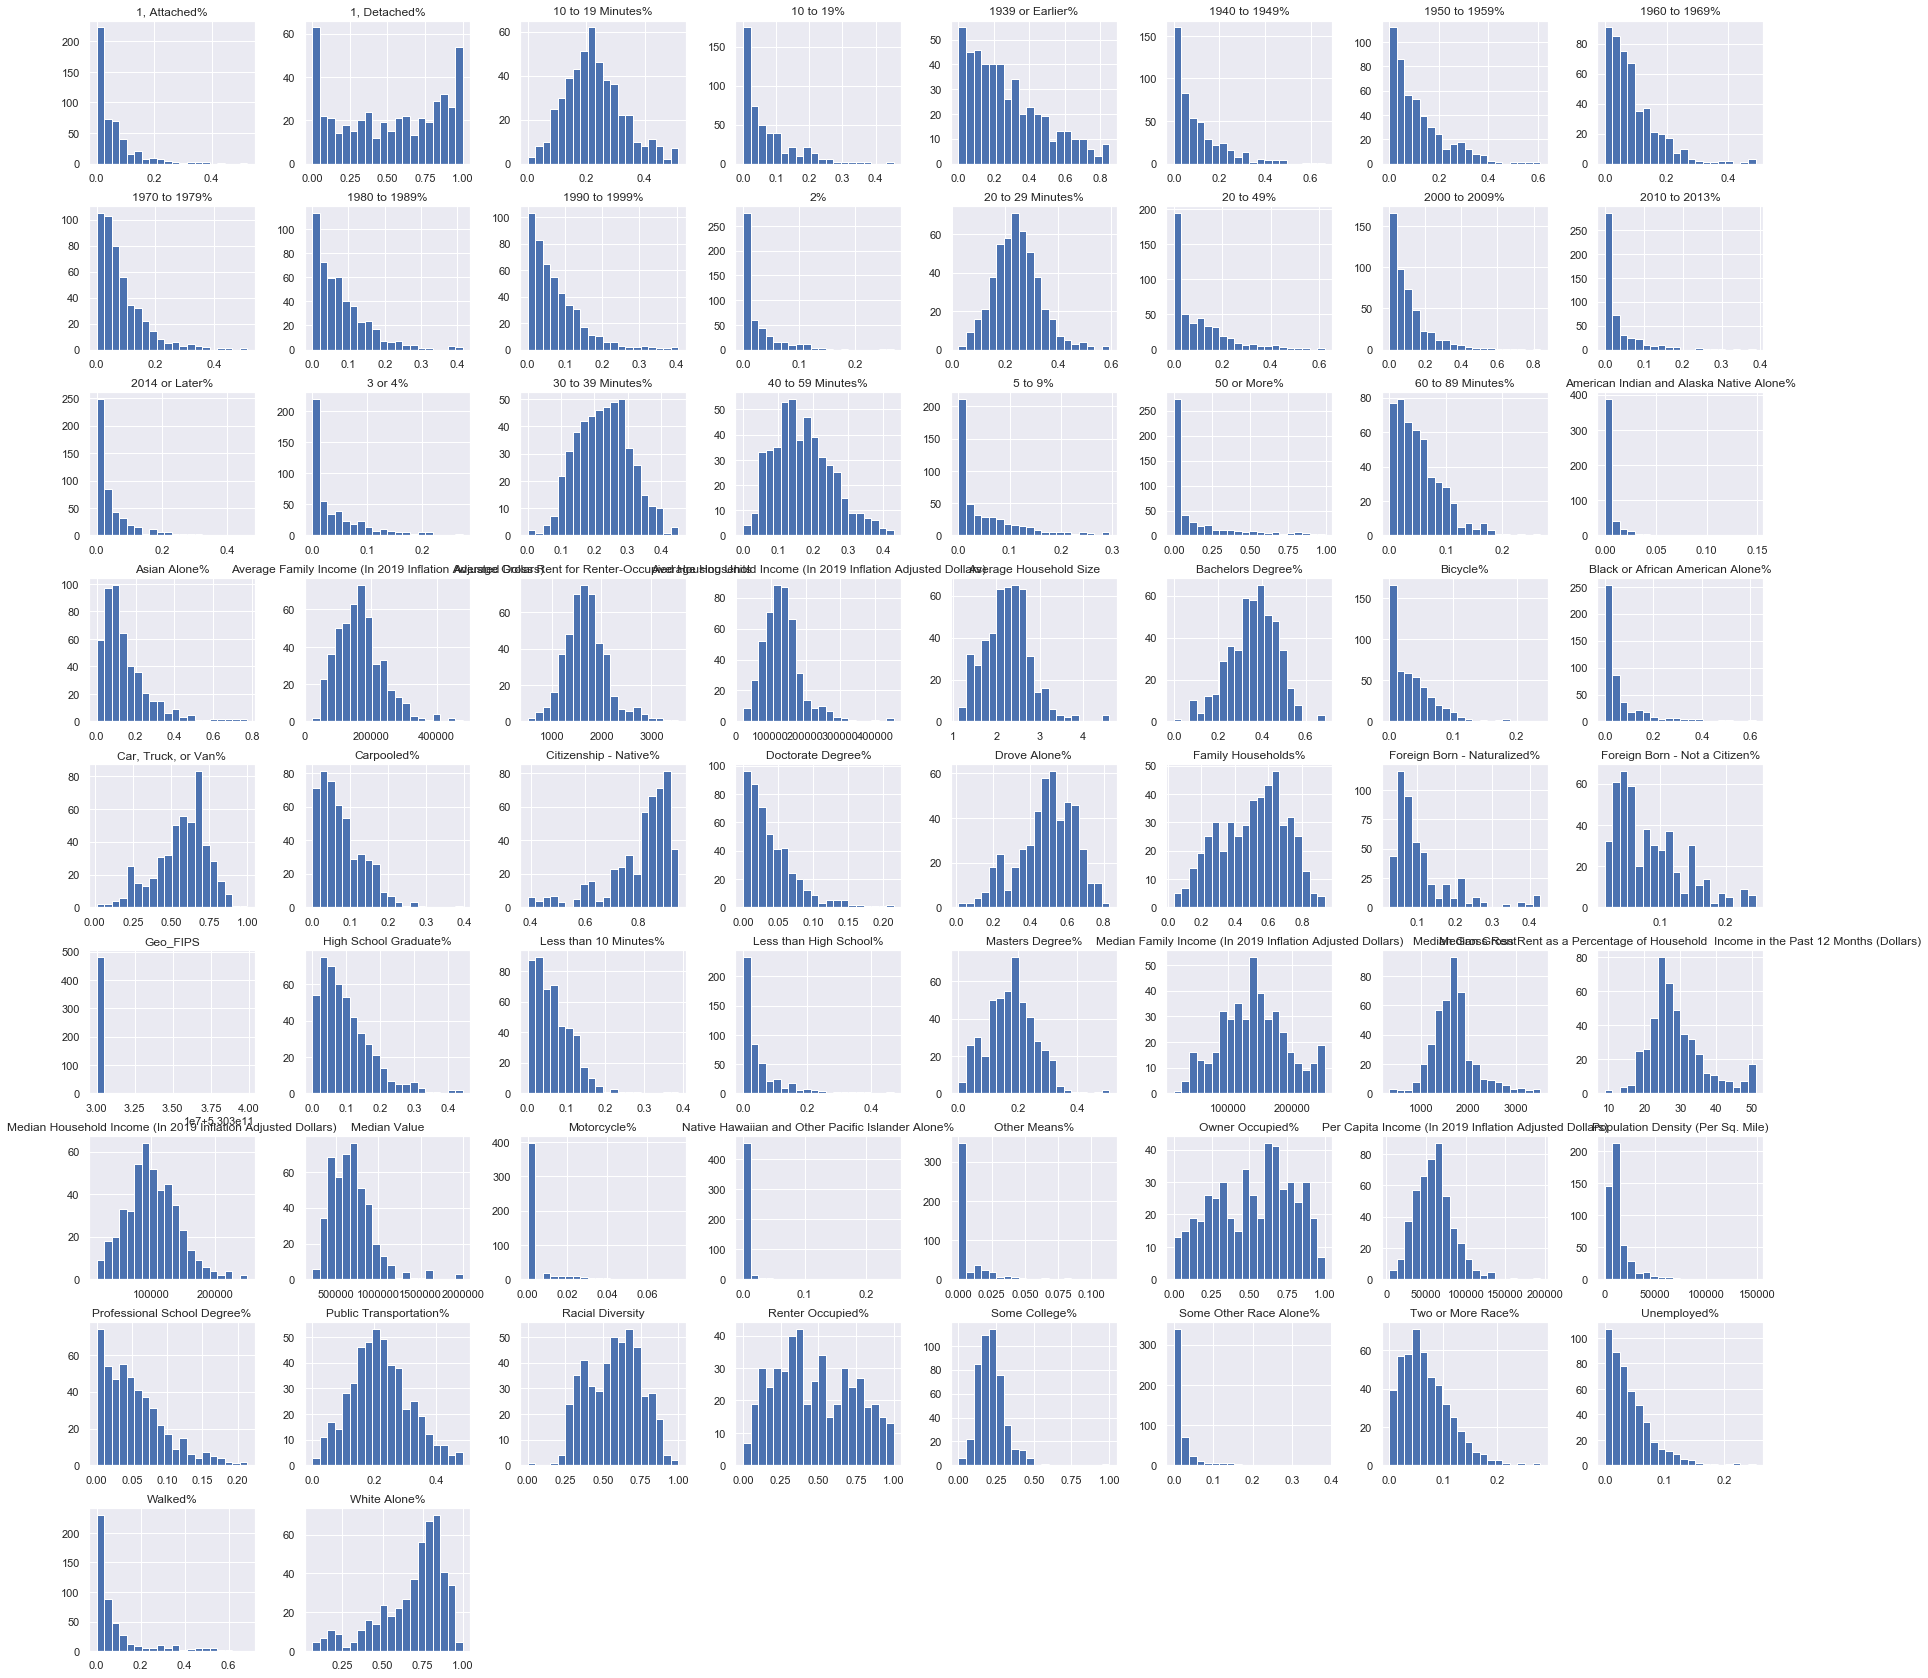

In [48]:
a = df.hist(bins=20, figsize=(30, 30))

In [50]:
df_s = df.apply(lambda x: pd.Series(stats.shapiro(x), index=['W','P']))

In [51]:
df_s

,Geo_FIPS,Population Density (Per Sq. Mile),White Alone%,Black or African American Alone%,American Indian and Alaska Native Alone%,Asian Alone%,Native Hawaiian and Other Pacific Islander Alone%,Some Other Race Alone%,Two or More Race%,Racial Diversity,Citizenship - Native%,Foreign Born - Naturalized%,Foreign Born - Not a Citizen%,Family Households%,Average Household Size,Less than High School%,High School Graduate%,Some College%,Bachelors Degree%,Masters Degree%,Professional School Degree%,Doctorate Degree%,Unemployed%,Median Household Income (In 2019 Inflation Adjusted Dollars),Average Household Income (In 2019 Inflation Adjusted Dollars),Median Family Income (In 2019 Inflation Adjusted Dollars),Average Family Income (In 2019 Inflation Adjusted Dollars),Per Capita Income (In 2019 Inflation Adjusted Dollars),Owner Occupied%,Renter Occupied%,"1, Detached%","1, Attached%",2%,3 or 4%,5 to 9%,10 to 19%,20 to 49%,50 or More%,Median Value,Median Gross Rent,Median Gross Rent as a Percentage of Household Income in the Past 12 Months (Dollars),Average Gross Rent for Renter-Occupied Housing Units,2014 or Later%,2010 to 2013%,2000 to 2009%,1990 to 1999%,1980 to 1989%,1970 to 1979%,1960 to 1969%,1950 to 1959%,1940 to 1949%,1939 or Earlier%,"Car, Truck, or Van%",Drove Alone%,Carpooled%,Public Transportation%,Motorcycle%,Bicycle%,Walked%,Other Means%,Less than 10 Minutes%,10 to 19 Minutes%,20 to 29 Minutes%,30 to 39 Minutes%,40 to 59 Minutes%,60 to 89 Minutes%
W,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
P,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
